In [5]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random 

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
    
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))


In [6]:
def IC_bounds():
    x31_x75 = np.array([dom_x_positions[31][1],dom_x_positions[75][1]])
    y31_y75 = np.array([dom_y_positions[31][1],dom_y_positions[75][1]])
    
    x75_x78 = np.array([dom_x_positions[75][1],dom_x_positions[78][1]])
    y75_y78 = np.array([dom_y_positions[75][1],dom_y_positions[78][1]])
    
    x78_x72 = np.array([dom_x_positions[78][1],dom_x_positions[72][1]])
    y78_y72 = np.array([dom_y_positions[78][1],dom_y_positions[72][1]])
    
    x72_x74 = np.array([dom_x_positions[72][1],dom_x_positions[74][1]])
    y72_y74 = np.array([dom_y_positions[72][1],dom_y_positions[74][1]])
    
    x74_x50 = np.array([dom_x_positions[74][1],dom_x_positions[50][1]])
    y74_y50 = np.array([dom_y_positions[74][1],dom_y_positions[50][1]])
    
    x50_x6 = np.array([dom_x_positions[50][1],dom_x_positions[6][1]])
    y50_y6 = np.array([dom_y_positions[50][1],dom_y_positions[6][1]])
    
    x6_x1 = np.array([dom_x_positions[6][1],dom_x_positions[1][1]])
    y6_y1 = np.array([dom_y_positions[6][1],dom_y_positions[1][1]])
    
    x1_x31 = np.array([dom_x_positions[1][1],dom_x_positions[31][1]])
    y1_y31 = np.array([dom_y_positions[1][1],dom_y_positions[31][1]])
    
    plt.plot(x31_x75, y31_y75, color='red')
    plt.plot(x75_x78, y75_y78, color='red')
    plt.plot(x78_x72, y78_y72, color='red')
    plt.plot(x72_x74, y72_y74, color='red')
    plt.plot(x74_x50, y74_y50, color='red')
    plt.plot(x50_x6, y50_y6, color='red')
    plt.plot(x6_x1, y6_y1, color='red')
    plt.plot(x1_x31, y1_y31, color='red')
    

### method to generate sunflower geometry using slides from Lu
- took 𝑟 = 𝑠√𝑛, 𝜙 = (2𝜋/𝑔^2)*𝑛 from arXiv:2107.08527v2 using n as the natural numbers (0,21) and s = 240 m for string spacin

In [60]:
"""  start_n: initial value of n
     stop n: end value of n
     s: scale factor to define string spacing
"""

def sunflower_coords(start_n, stop_n, s):
    #golden ratio
    g = (1 + math.sqrt(5))/2
    
    r_positions = []
    for n in range(start_n,stop_n):
        r = s*((n)**(1/2))
        r_positions = np.append(r_positions, r)
    #print('this is r_positions')
    #print(r_positions)
    
    #convert (r,theta) to (x, y)
    x_points = []
    y_points = []
    t = 0
    t_add = ((2*math.pi)/(g**2))
    #print("initial t")
    #print(t)
    for r in r_positions:
        x = r*(math.cos(t))
        y = r*(math.sin(t))
        t = t + t_add
        #print(t)
        x_points = np.append(x_points, x)
        y_points = np.append(y_points, y)
        
    split_size = 67
    x_points = np.repeat(x_points, 67)
    y_points = np.repeat(y_points, 67)
    xx_1 = [x_points[i:i+split_size] for i in range(0, len(x_points), split_size)]
    yy_1 = [y_points[i:i+split_size] for i in range(0, len(y_points), split_size)]
    xx_2 = np.asarray(xx_1)
    yy_2 = np.asarray(yy_1)
    #print("x points")
    #print(x_points)
    #print('y points')
    #print(y_points)
    
    return xx_2, yy_2

In [63]:
x , y = sunflower_coords(0,21,120)
print(x)
print(len(x[0]))
print(y)
print(len(y[0]))

[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [ -88.48426537  -88.48426537  -88.48426537 ...  -88.48426537
   -88.48426537  -88.48426537]
 [  14.83663747   14.83663747   14.83663747 ...   14.83663747
    14.83663747   14.83663747]
 ...
 [ 360.8770216   360.8770216   360.8770216  ...  360.8770216
   360.8770216   360.8770216 ]
 [ -24.16126139  -24.16126139  -24.16126139 ...  -24.16126139
   -24.16126139  -24.16126139]
 [-343.84060847 -343.84060847 -343.84060847 ... -343.84060847
  -343.84060847 -343.84060847]]
67
[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [  81.05883531   81.05883531   81.05883531 ...   81.05883531
    81.05883531   81.05883531]
 [-169.05583157 -169.05583157 -169.05583157 ... -169.05583157
  -169.05583157 -169.05583157]
 ...
 [-359.1208366  -359.1208366  -359.1208366  ... -359.1208366
  -359.1208366  -359.1208366 ]
 [ 522.50955345  522.50955345  522.50955345 ...  522.50955345
   522.50955

In [64]:
"""  x: choosen x cooordinates
     y: choosen y coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_2d_icetop(x, y, random_gen):
    fig, ax = plt.subplots()
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_title("2D Gen2 Geometry with IceTop \n" + random_gen)
    IC_bounds()
    ax.scatter(x, y, s =9, c='blue')
    return fig
    

done


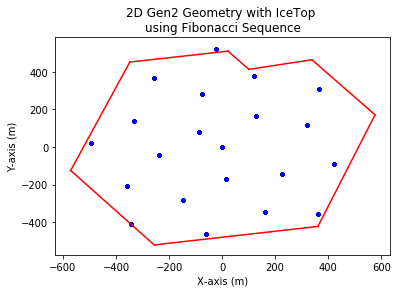

In [65]:
plot_2d_icetop(x, y, "using Fibonacci Sequence")
print('done')

### method to generate sunflower geometry using chromoSpirals.py from http://pi3.sites.sheffield.ac.uk/tutorials/week-2


In [49]:
# chromoSpirals.py
# ----------------
# Code written by Peter Derlien, University of Sheffield, March 2013
# Draws spiralling patterns of circles using the Golden Angle.
# ----------------

# Import from the numpy and matplotlib packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches

def chromo_spiral_coords(n_strings, theta_initial, s):
    ox=0.0; oy=0.0 # centre of plot

    tau=(1+5**0.5)/2.0 # golden ratio approx = 1.618033989
    #(2-tau)*2*np.pi is golden angle = c. 2.39996323 radians, or c. 137.5 degrees
    inc = (2-tau)*2*np.pi
    drad=(1+5**0.5)/8.0 # radius of each disc

    # now collect in list 'patches' the locations of all the discs
    x_pos = []
    y_pos =[]
    for j in range(1,n_strings+1):
        r = j**0.5
        theta_initial += inc
        x = ox + r*np.cos(theta_initial)
        y = oy + r*np.sin(theta_initial)
        x_pos = np.insert(x_pos, j-1, x)
        y_pos = np.insert(y_pos, j-1, y)
        
    x_coords = s*x_pos
    y_coords = s*y_pos
    
    split_size = 67
    x_coords = np.repeat(x_coords, 67)
    y_coords = np.repeat(y_coords, 67)
    xx_1 = [x_coords[i:i+split_size] for i in range(0, len(x_coords), split_size)]
    yy_1 = [y_coords[i:i+split_size] for i in range(0, len(y_coords), split_size)]
    xx_2 = np.asarray(xx_1)
    yy_2 = np.asarray(yy_1)
    print("x positions")
    print(xx_2)
    print("y positions")
    print(yy_2)
    
    return xx_2, yy_2
    

In [56]:
xx, yy = chromo_spiral_coords(21, 0, 120)
print(len(xx[0]))
print(type(xx[0]))

x positions
[[ -88.48426537  -88.48426537  -88.48426537 ...  -88.48426537
   -88.48426537  -88.48426537]
 [  14.83663747   14.83663747   14.83663747 ...   14.83663747
    14.83663747   14.83663747]
 [ 126.46164246  126.46164246  126.46164246 ...  126.46164246
   126.46164246  126.46164246]
 ...
 [ -24.16126139  -24.16126139  -24.16126139 ...  -24.16126139
   -24.16126139  -24.16126139]
 [-343.84060847 -343.84060847 -343.84060847 ... -343.84060847
  -343.84060847 -343.84060847]
 [ 544.99807234  544.99807234  544.99807234 ...  544.99807234
   544.99807234  544.99807234]]
y positions
[[  81.05883531   81.05883531   81.05883531 ...   81.05883531
    81.05883531   81.05883531]
 [-169.05583157 -169.05583157 -169.05583157 ... -169.05583157
  -169.05583157 -169.05583157]
 [ 164.94681866  164.94681866  164.94681866 ...  164.94681866
   164.94681866  164.94681866]
 ...
 [ 522.50955345  522.50955345  522.50955345 ...  522.50955345
   522.50955345  522.50955345]
 [-412.03596441 -412.03596441 -412.

done


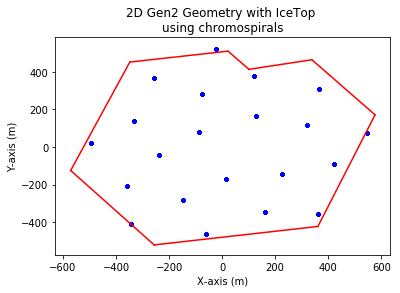

In [58]:
plot_2d_icetop(xx, yy, "using chromospirals")
print('done')